## Observations and Insights 

In [112]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
data = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "inner")

# Display the data table for preview
print(data.shape)
data.head()

(1893, 8)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [66]:
# Checking the number of mice.
unique_mice = data["Mouse ID"].unique()
number_of_unique_mice = len(unique_mice)
number_of_unique_mice

249

In [67]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = data[ data[["Mouse ID","Timepoint"]].duplicated() ]
dup_mice_id = dup_mice["Mouse ID"].unique()
print(dup_mice_id[0])

g989


In [72]:
# Optional: Get all the data for the duplicate mouse ID. 
data_clean = data.set_index("Mouse ID")
data_clean.loc[[dup_mice_id[0]]]

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [73]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_clean = data_clean.drop(index = dup_mice_id[0])
data_clean.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


In [74]:
# Checking the number of mice in the clean DataFrame.
unique_mice = data_clean.index.unique()
number_of_unique_mice = len(unique_mice)
number_of_unique_mice

248

## Summary Statistics

In [75]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary = pd.DataFrame({'Drug Regimen':data_clean['Drug Regimen'].unique()})
data_grouped_tumor = data_clean[['Tumor Volume (mm3)', 'Drug Regimen']].groupby(['Drug Regimen'])

mean = data_grouped_tumor['Tumor Volume (mm3)'].mean().to_frame(name = 'mean')
summary = pd.merge(summary, mean, on = 'Drug Regimen')

median = data_grouped_tumor['Tumor Volume (mm3)'].median().to_frame(name = 'median')
summary = pd.merge(summary, median, on = 'Drug Regimen')

variance = data_grouped_tumor['Tumor Volume (mm3)'].var().to_frame(name = 'variance')
summary = pd.merge(summary, variance, on = 'Drug Regimen')

std = data_grouped_tumor['Tumor Volume (mm3)'].std().to_frame(name = 'std')
summary = pd.merge(summary, std, on = 'Drug Regimen')

sem = data_grouped_tumor['Tumor Volume (mm3)'].sem().to_frame(name = 'sem')
summary = pd.merge(summary, sem, on = 'Drug Regimen')

summary

,Drug Regimen,mean,median,variance,std,sem
0,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
1,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
4,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
5,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
6,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
7,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
8,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
9,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [76]:
# Using the aggregation method, produce the same summary statistics in a single line
data_grouped_tumor.agg(['mean', 'median', 'var', 'std', 'sem'])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

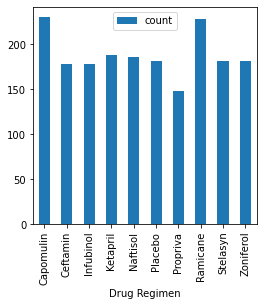

In [77]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
data_grouped_timepoint = data_clean[['Timepoint', 'Drug Regimen']].groupby(['Drug Regimen'])
num_timepoints = data_grouped_timepoint['Timepoint'].count().to_frame(name = 'count')

num_timepoints.plot(kind="bar", figsize=(4,4))

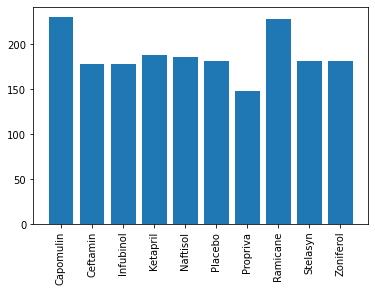

In [78]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(num_timepoints.index, height = num_timepoints['count'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:ylabel='count'>

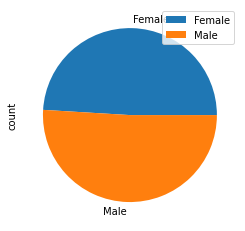

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution_grouped = data_clean[['Sex','Drug Regimen']].groupby(['Sex'])
sex_distribution = sex_distribution_grouped['Drug Regimen'].count().to_frame(name = 'count')

sex_distribution.plot.pie(y = 'count')

([<matplotlib.patches.Wedge at 0x7fd4fa20c100>,
 [Text(0.03308201408261561, 1.0995024239828841, 'Female'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Male')])

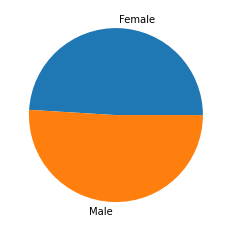

In [80]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_distribution['count'], labels = ['Female', 'Male'])

## Quartiles, Outliers and Boxplots

In [84]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_volume = data_clean [ data_clean['Drug Regimen'].isin(drugs) ]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_grouped = final_volume.groupby(['Mouse ID'])
last_timepoint = last_timepoint_grouped['Timepoint'].max().to_frame(name = 'Timepoint')

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_volume = pd.merge(final_volume, last_timepoint, on = ["Mouse ID", "Timepoint"], how = "right")
final_volume.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a275,Ceftamin,Female,20,28,45,62.999356,3
a411,Ramicane,Male,3,22,45,38.407618,1
a444,Ramicane,Female,10,25,45,43.047543,0


In [87]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

for drug in drugs:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_tumors = final_volume[ final_volume['Drug Regimen'] == drug ]
    drug_vol =  drug_tumors['Tumor Volume (mm3)']
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    Q1 = drug_vol.quantile(0.25)
    Q3 = drug_vol.quantile(0.75)
    IQR = round(Q3 - Q1, 5)
    print(f"Q1 = {Q1}")
    print(f"Q3 = {Q3}")
    print(f"IQR = {IQR}")
    
    # Determine outliers using upper and lower bounds
    drug_outliers = drug_vol.loc[(drug_vol < Q1) | (drug_vol > Q3)]
        
    # add subset 
    tumor_vol.append(drug_vol.tolist())
    
    print(f"Potential outliers in {drug}:\n{drug_outliers}")

Q1 = 32.37735684
Q3 = 40.1592203
IQR = 7.78186
Potential outliers in Capomulin:
Mouse ID
f966    30.485985
i557    47.685963
l509    41.483008
m601    28.430964
r157    46.539206
r944    41.581521
s185    23.343598
s710    40.728578
u364    31.023923
v923    40.658124
x401    28.484033
y793    31.896238
Name: Tumor Volume (mm3), dtype: float64
Q1 = 31.56046955
Q3 = 40.65900627
IQR = 9.09854
Potential outliers in Ramicane:
Mouse ID
a444    43.047543
g791    29.128472
k403    22.050126
m546    30.564625
n364    31.095335
q597    45.220869
r921    43.419381
s508    30.276232
u196    40.667713
w678    43.166373
y449    44.183451
z578    30.638696
Name: Tumor Volume (mm3), dtype: float64
Q1 = 54.04860769
Q3 = 65.52574285
IQR = 11.47714
Potential outliers in Infubinol:
Mouse ID
a203    67.973419
a685    66.083066
c139    72.226731
c326    36.321346
i386    67.289621
k483    66.196912
m756    47.010364
o813    45.699331
v339    46.250112
v766    51.542431
w193    50.005138
y163    67.685569
N

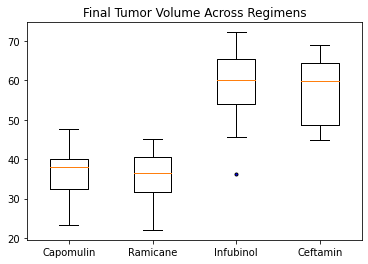

In [89]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
blue_circle = dict(markerfacecolor='b', marker='.')
fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume Across Regimens')
ax.boxplot(tumor_vol, flierprops = blue_circle)
plt.xticks(ticks = range(1,5), labels = drugs)
plt.show()

## Line and Scatter Plots

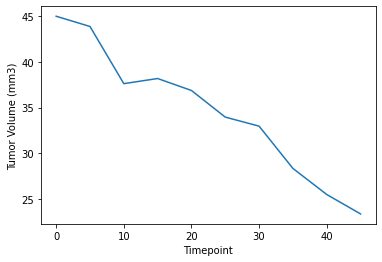

In [108]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
drug_tumors = data_clean.loc['s185']
plt.plot(drug_tumors['Timepoint'], drug_tumors['Tumor Volume (mm3)'])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

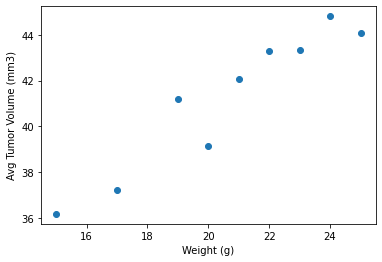

In [109]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumors_grouped = data_clean[ data_clean['Drug Regimen'] == "Capomulin" ].groupby("Weight (g)")
avg_volume = tumors_grouped.mean("Tumor Volume (mm3)")
plt.scatter(avg_volume.index, avg_volume['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [114]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
coefficient = round(st.pearsonr(avg_volume.index, avg_volume['Tumor Volume (mm3)'])[0],2)
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {coefficient}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_volume.index, avg_volume['Tumor Volume (mm3)'])
regress_values = avg_volume.index * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression between mouse weight and average tumor volume for the Capomulin regimen is {line_eq}")

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.95
The linear regression between mouse weight and average tumor volume for the Capomulin regimen is y = 0.89x + 22.76
